# What is Image Stitching ?

*Image stitching or photo stitching is the process of combining multiple photographic images with overlapping fields of view to produce a segmented panorama or high-resolution image.*

<center><img src="data\homography\image_stitching.png"></center>

## Image Transformations

Image Manipulation refers to a process of bringing changes to a digitized image for transforming it to a desired image. The changes are made possible by resorting to image processing.

There are two types of image manipulation :
- Image filtering (changing range of bringtness)
- Image Warping (change domain/location)

$$ g(x,y) = f(T_{d}(x,y)) $$
 
Transformation $T_{d}$ is a coordinate changing operation.

$T_{d}$ can be represented by a a matrix $T$ 

Let's look at some image warping transformations.


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load the image
image = cv2.imread('data\homography\girl_art.jpg')

In [3]:
def show(image):
  '''
  Displays an image loaded with cv2 and convert the image to RGB
  '''
  plt.figure(figsize=(6,6))
  plt.axis('off')
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(rgb)
  plt.show()
  

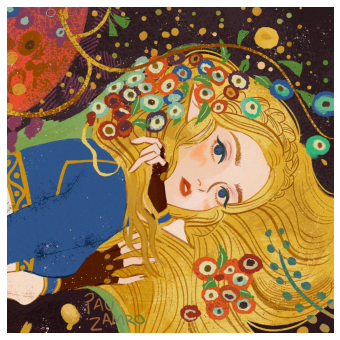

In [4]:
show(image)

### Affine transformations

As the name suggests in this transformation, preserving parallel relationships is one of the main concepts of this kind of transformation where lines will remain the same. Still, the square can change into a rectangle or parallelogram. It works by preserving the lengths and angles. 

<h4>Skew Image</h4>

In [20]:
num_rows, num_cols = image.shape[:2]

OpenCV provides two transformation functions, ``cv.warpAffine`` and ``cv.warpPerspective``, with which you can perform all kinds of transformations. ``cv.warpAffine`` takes a 2x3 transformation matrix while ``cv.warpPerspective`` takes a 3x3 transformation matrix as input.

In [6]:
'''
Image Translation
In computer vision or image processing, shifting an image into a frame is considered as the image translation.
'''

translation_matrix = np.float32([[1, 0, 200],
                                 [0, 1, 110],
                                 [0, 0, 1]
                                 ])
img_translation = cv2.warpPerspective(
    image, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)


# Image Rotation
img_rotation = cv2.warpAffine(image, cv2.getRotationMatrix2D(
    (num_cols/2, num_rows/2), 30, 0.8), (num_cols, num_rows))

# Image Scaling
img_shrinked = cv2.resize(image, (150, 200), interpolation=cv2.INTER_AREA)
img_enlarged = cv2.resize(image, None, fx=5, fy=1.5,
                          interpolation=cv2.INTER_CUBIC)

Text(0.5, 1.0, 'Image enlarging')

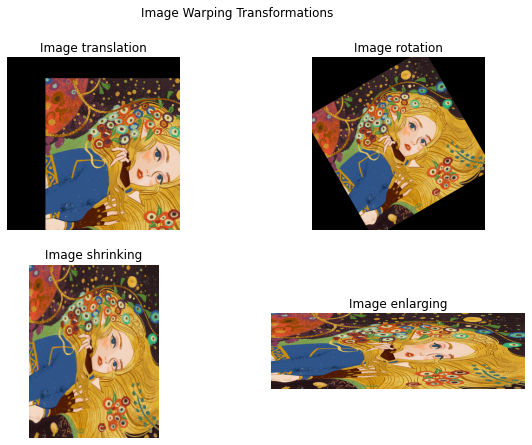

In [7]:
fig, axes = plt.subplots(2,2,figsize=(10,7))
fig.suptitle('Image Warping Transformations')
[axi.set_axis_off() for axi in axes.ravel()]

axes[0,0].imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Image translation')

axes[0,1].imshow(cv2.cvtColor(img_rotation, cv2.COLOR_BGR2RGB))
axes[0,1].set_title('Image rotation')


axes[1,0].imshow(cv2.cvtColor(img_shrinked, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('Image shrinking')

axes[1,1].imshow(cv2.cvtColor(img_enlarged, cv2.COLOR_BGR2RGB))
axes[1,1].set_title('Image enlarging')

In [8]:
# 3x2 matrix transformation
src_points = np.float32([[0,0], 
                         [num_cols-1,0], 
                         [0,num_rows-1]]
                        )

dst_points = np.float32([[0,0], 
                         [int(0.6*(num_cols-1)),0],
                         [int(0.4*(num_cols-1)),num_rows-1]]
                        )

In [9]:
# Skewed image
matrix = cv2.getAffineTransform(src_points, dst_points)
img_afftran = cv2.warpAffine(image, matrix, (num_cols,num_rows))

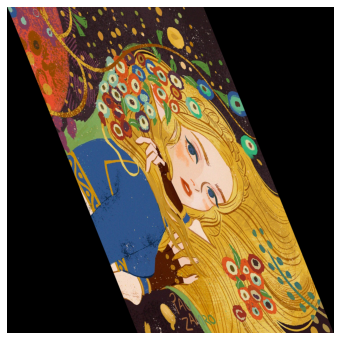

In [10]:
show(img_afftran)

<h4>Image Mirror</h4>
The mirror of an image consists on flipping the axis on the direction you want (y or x axis).

Mirror about Y-axis :

$$ x_2 = - x_1 \\
y_2 = y_1 \\ \\

M_y = \begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}

$$

In [11]:
src_points = np.float32([[0, 0],
                         [num_cols-1, 0], 
                         [0, num_rows-1]])

dst_points = np.float32([[num_cols-1, 0],
                         [0, 0], 
                         [num_cols-1, num_rows-1]])


mirror_matrix = cv2.getAffineTransform(src_points, dst_points)

img_mirror = cv2.warpAffine(image, mirror_matrix, (num_cols, num_rows))

Text(0.5, 1.0, 'Mirror')

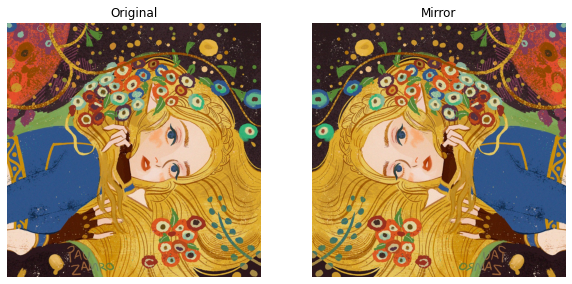

In [12]:
f, axarr = plt.subplots(1,2,figsize=(10,10))
[axi.set_axis_off() for axi in axarr.ravel()]

axarr[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axarr[0].set_title('Original')

axarr[1].imshow(cv2.cvtColor(img_mirror, cv2.COLOR_BGR2RGB))
axarr[1].set_title('Mirror')

### Projective Transformations

As seen in the Affine transformation, we have less control in shifting the points, but in projective transformation, we have the freedom to move and shift the control points. It works on the projective view option where we see an object from its every plane. For example, a square image on paper from the front side looks like a square, but it will look like a trapezoid from the slight right or left side.

The point of the projection matrix is to map one plane to another through a point.

That matrix is also called **Homography**.

In [32]:
# We always need to define at least 4 points
src = np.array([[50, 50], 
                [450, 450],
                [70, 420], 
                [420, 70]],
               np.float32)


dst = np.array([[0, 0],
                [299, 299],
                [0, 299],
                [299, 0]],
               np.float32)

In [33]:
projective_matrix = cv2.getPerspectiveTransform(src,dst)
projective_matrix

array([[  0.8360977 ,  -0.04519447, -39.54516129],
       [ -0.04519447,   0.8360977 , -39.54516129],
       [  0.00006452,   0.00006452,   1.        ]])

In [34]:
img_protran = cv2.warpPerspective(image, projective_matrix, (num_cols,num_rows))

Text(0.5, 1.0, 'Homography')

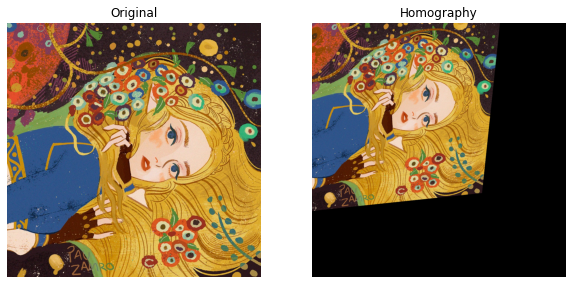

In [35]:
f, axarr = plt.subplots(1,2,figsize=(10,10))
[axi.set_axis_off() for axi in axarr.ravel()]

axarr[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axarr[0].set_title('Original')

axarr[1].imshow(cv2.cvtColor(img_protran, cv2.COLOR_BGR2RGB))
axarr[1].set_title('Homography')

## 🌆 Computing Homography 

<center><img src="data\homography\homography_explained.jpg" width=600 ></center>

If two planes (or images) $C_1$ and $C_2$ are sharing the same center of projection $X$, we can map all the images to a single plan $\pi$ by simply computing the homography between the images. 

The two images will share some common regions that can be aligned and stitched.


It is very useful to us when stitching panoramas.

A Homography is a transformation (a 3×3 matrix) that maps the points in one image to the corresponding points in the other image.

$$
H = \begin{bmatrix}
h_{00} & h_{01} & h_{02}  \\
h_{10} & h_{11} & h_{12} \\
h_{20} & h_{21} & h_{22}
\end{bmatrix}
$$

If we considere a set of corresponding points $(x_1,y_1)$ in the first image and $(x_2,y_2)$ in the second image, then, the homography $H$ maps them in the following way : 

$$
\begin{bmatrix}
x_{1}  \\
y_{1} \\
1 
\end{bmatrix} = H
\begin{bmatrix}
x_{2}  \\
y_{2} \\
1
\end{bmatrix}
$$

 
- How do we compute Homography ?

We need to start by defining a set of matching features/features between image 1 and 2 and then find the homography $H$ that best "agrees" with the matches.

When defining our homography matrix $H$, we ended up with 9 unknows ($h_i$) but we have 8 degrees of freedom (the $z$ coordinate is virtual). If you go by solving the linear system equation generated by the product of the vectors and constrained Least Squares problem (defining a lost function $L(h,\lambda)$, finding the eigenvector $h$ with the smallest eigen value, etc... <a href="#references">$^5$</a>), you end up needed at least 4 points correspondences between the two images (if there is more, it is even better).

These points correspondences are computed automatically by matching features using SIFT, SURF or ORB between images.

We already talked about how to compute these keypoints matching features in our <a href="link/to/notebook">last notebook</a>. By reusing the code, we are going to write a function that returns the best matches between two images and then compute the homography between these points.

In [ ]:
def best_matches(image1,image2):
  sift = cv2.SIFT_create()
  
  # Step 1 : compute the keypoints and descriptors for each image
  kp1, desc1 = sift.detectAndCompute(image1, None)
  kp2, desc2 = sift.detectAndCompute(image2, None)
  

In [ ]:
# src_pts = np.float32([ coffee_keypoints[m.queryIdx].pt for m in good_features]).reshape(-1,1,2)
# dst_pts = np.float32([ desktop_keypoints[m.trainIdx].pt for m in good_features ]).reshape(-1,1,2)
# M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)

## Dealing with Outliers : RANSAC

After computing the homography matrix given to images, we used all the pair of features to compute it. 

However not all the pairs necesseraly correspond to valid matches. 

Unfortunately, there is no way of telling the difference between a valid (inliers) and unvalid (outliers) matchs. 

In order to solve this issue, we use an algorithm called **RANSAC** (Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method).


## Warping and Blending Images

# 📚 References <p id="references"></p>

1. *First Principles of Computer Vision*, https://youtu.be/J1DwQzab6Jg
2. *Image Stitching, Wikipedia*,https://en.wikipedia.org/wiki/Image_stitching
3. *Complete Tutorial On Image Transformations With OpenCV*, https://analyticsindiamag.com/complete-tutorial-on-image-transformations-with-opencv/
4. *Homography examples using OpenCV ( Python / C ++ )*,https://learnopencv.com/homography-examples-using-opencv-python-c
5. *Computing Homography | Image Stitching*, https://youtu.be/l_qjO4cM74o
6. *Random sample consensus*, https://en.wikipedia.org/wiki/Random_sample_consensus